In [1]:
sys.path.append('/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph')
sys.path.append('../')
from Generator import *
import matplotlib.pyplot as plt
from util import *
from loss import *
from Estimator import *
from cluster import *

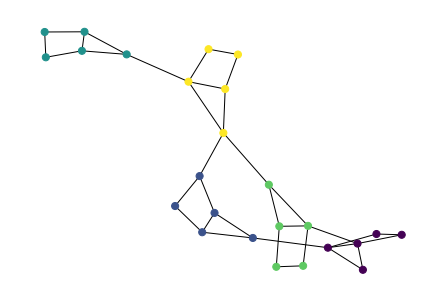

In [2]:
list_shapes = ['nx.house_graph'] * 5
list_shapes_args = [[]]*5
graph_type = 'nx.connected_watts_strogatz_graph'
graph_args = [5, 2, 0.4]
G, Gg, group_label, shape_label, shape_dist = synthetic_graph_generator(list_shapes, list_shapes_args, graph_type, graph_args, \
    plot=True, plot_color='group_label')
L, D, Gamma = graph_to_mat(G)
U, latent_features, node_features = noisy_feature_generator(group_label, dim_features=20, dim_latent_features=8, std=0) 

/Users/liushuhan/opt/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


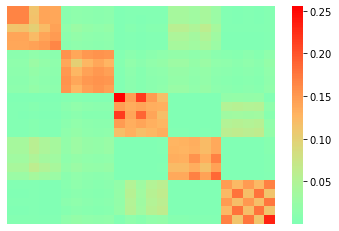

In [3]:
ase = as_El_Estimator(alpha=5, beta=5, gamma=10, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
ase.fit(node_features, maxiter=1000)
W = ase.scaling(xticklabels=False, yticklabels=False, cbar=True, return_value=True)

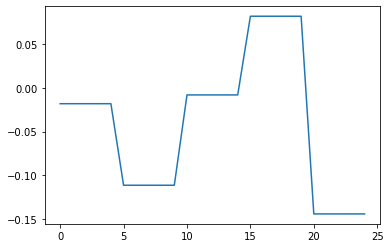

In [4]:
pred_final = post_process(W, 0.2)
plt.plot(pred_final)

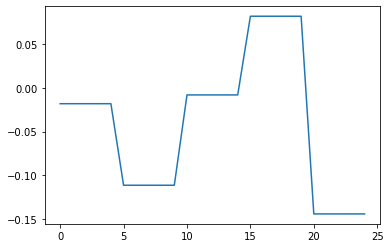

In [5]:
pred_final = post_process(W, None)
plt.plot(pred_final)